In [3]:
import pandas
import matplotlib.pyplot as plt
import math

In [43]:
data =  pandas.read_csv("/Users/bojan/Downloads/train.csv")

In [44]:
sum(data['suspicious'])

9087

In [45]:
sum(data['category'] == 0) #Individual

800146

In [46]:
sum(data[data['category'] == 0]['suspicious'])

8125

In [47]:
sum(data[data['category'] == 0]['suspicious']) / sum(data['category'] == 0) * 100

1.0154396822579879

In [48]:
sum(data['category'] == 1) #Business

149780

In [49]:
sum(data[data['category'] == 1]['suspicious'])

720

In [50]:
sum(data[data['category'] == 1]['suspicious']) /sum(data['category'] == 1) * 100

0.48070503404993986

In [51]:
sum(data['category'] == 2) #Organization

50074

In [52]:
sum(data[data['category'] == 2]['suspicious'])

242

In [53]:
sum(data[data['category'] == 2]['suspicious']) / sum(data['category'] == 2) * 100

0.48328473858689147

In [54]:
sum(data[data['is_pep'] == 1]['suspicious']) / sum(data['is_pep'] == 1) * 100

0.7312153303076148

In [55]:
data_people = data[data['category'] == 0]

In [56]:
data_companies = data[data['category'] != 0]

In [57]:
data_companies = data_companies.drop("is_pep", axis=1)

In [58]:
data_companies = data_companies.drop("age", axis=1)

turnover normalize
turnover expand with log

combine transaction_count with io_ratio
to have transation_in and transation_out

nationaly make one-hot encodding

age we normalize and add 4 categories


In [59]:
data_companies.head()

,customer,category,suspicious,turnover,transaction_count,io_ratio,nationality,inactive_days_average,inactive_days_max,n_of_accounts,distinct_counterparties,channel_risk,atm_withdrawal,atm_deposit
1,90000001,1,0,1009400.35,2.0,0.5,33,78.49,79.0,3,1.0,0.635584,53.97,34.752298
23,90000023,1,0,1115814.55,1.0,1.0,94,41.57,84.0,2,1.0,0.329963,4528.47,0.000000
31,90000031,2,0,3224701.88,1.0,0.0,172,13.78,14.0,3,1.0,0.081462,3224701.88,287.056598
32,90000032,2,0,74551181.74,2.0,0.5,33,32.62,98.0,2,1.0,0.193763,2750.52,910.549164
33,90000033,1,0,50439.74,2.0,0.0,94,22.05,45.0,1,1.0,0.477056,0.00,520.397080


In [60]:
set(data_companies["nationality"])

{18, 32, 33, 45, 50, 66, 94, 113, 123, 134, 141, 172, 176, 191}

In [61]:
set(data_people["nationality"])

{18, 32, 33, 45, 47, 50, 66, 94, 113, 117, 123, 134, 141, 172, 176, 191}

In [62]:
set(data_people["nationality"])

{18, 32, 33, 45, 47, 50, 66, 94, 113, 117, 123, 134, 141, 172, 176, 191}

In [63]:
data_test =  pandas.read_csv("/Users/bojan/Downloads/test.csv")

In [64]:
set(data_test['nationality'])

{18, 32, 33, 45, 47, 50, 66, 94, 113, 123, 134, 141, 172, 176, 191}

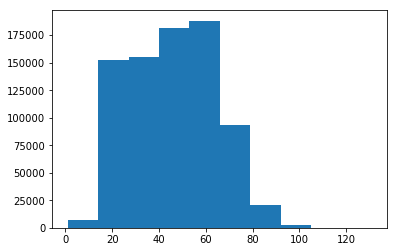

In [65]:
plt.hist(data_people['age'], bins=10)
plt.show()

In [66]:
plt.plot(list(map (lambda x: len(data_people[(data_people['age']>= x) & (data_people['age']< x+10) & (data_people['suspicious'] == 1)])/len(data_people[(data_people['age']>= x) & (data_people['age']< x+10)]), range(0,120,5))))

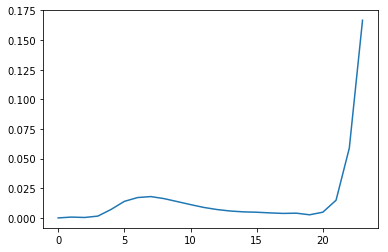

In [67]:
plt.show()

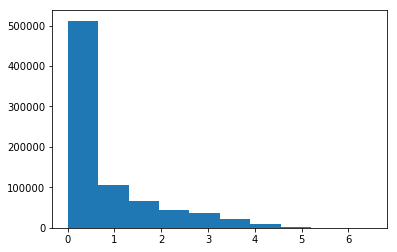

In [68]:
plt.hist(data_people['distinct_counterparties'].apply(lambda x: 0 if x==0 else math.log(x)))
plt.show()

In [69]:
plt.plot(list(map (lambda x: len(data_people[(data_people['distinct_counterparties']>= x) & (data_people['distinct_counterparties']< x+100) & (data_people['suspicious'] == 1)])/len(data_people[(data_people['distinct_counterparties']>= x) & (data_people['distinct_counterparties']< x+100)]), range(0,700,100))))

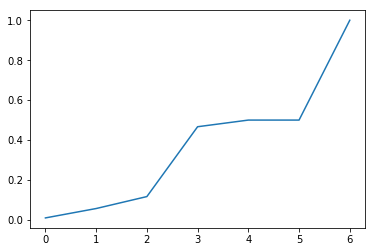

In [70]:
plt.show()

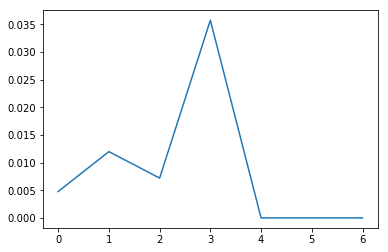

In [71]:
plt.plot(list(map (lambda x: len(data_companies[(data_companies['distinct_counterparties']>= x) & (data_companies['distinct_counterparties']< x+100) & (data_companies['suspicious'] == 1)])/len(data_companies[(data_companies['distinct_counterparties']>= x) & (data_companies['distinct_counterparties']< x+100)]), range(0,700,100))))
plt.show()

In [72]:
data_people = data_people.drop("category", axis=1)
data_people = data_people.drop("customer", axis=1)
data_people["turnover_log"] = data_people["turnover"].apply(lambda x: 0 if x < 1 else math.log(x))
data_people["atm_withdrawal_log"] = data_people["atm_withdrawal"].apply(lambda x: 0 if x < 1 else math.log(x))
data_people["atm_deposit_log"] = data_people["atm_deposit"].apply(lambda x: 0 if x < 1 else math.log(x))
data_people["distinct_counterparties_log"] = data_people["distinct_counterparties"].apply(lambda x: 0 if x < 1 else math.log(x))
data_people['transaction_in'] = data_people[["transaction_count","io_ratio"]].apply(lambda x: x['transaction_count']*x['io_ratio'] ,axis=1)
data_people['transaction_out'] = data_people[["transaction_count","transaction_in"]].apply(lambda x: x['transaction_count']-x['transaction_in'] ,axis=1)
data_people["transaction_in_log"] = data_people["transaction_in"].apply(lambda x: 0 if x < 1 else math.log(x))
data_people["transaction_out_log"] = data_people["transaction_out"].apply(lambda x: 0 if x < 1 else math.log(x))
data_people["transaction_count_log"] = data_people["transaction_count"].apply(lambda x: 0 if x < 1 else math.log(x))

In [73]:
data_people.keys()

Index(['suspicious', 'turnover', 'transaction_count', 'io_ratio', 'age',
       'nationality', 'is_pep', 'inactive_days_average', 'inactive_days_max',
       'n_of_accounts', 'distinct_counterparties', 'channel_risk',
       'atm_withdrawal', 'atm_deposit', 'turnover_log', 'atm_withdrawal_log',
       'atm_deposit_log', 'distinct_counterparties_log', 'transaction_in',
       'transaction_out', 'transaction_in_log', 'transaction_out_log',
       'transaction_count_log'],
      dtype='object')

In [75]:
mean_dict = {}
for col in [ 'turnover_log', 'atm_withdrawal_log',
       'atm_deposit_log', 'distinct_counterparties_log', 'transaction_in',
       'transaction_out', 'transaction_in_log', 'transaction_out_log',
       'transaction_count_log', 'atm_withdrawal', 'atm_deposit', 'distinct_counterparties', 'n_of_accounts',
        'transaction_count',"inactive_days_max", 'inactive_days_average', "turnover"]:
    mean = data_people[col].mean()
    std = data_people[col].std()
    mean_dict[col] = (mean,std)
    data_people[col] = data_people[col].apply(lambda x: (x-mean)/std)

In [76]:
data_people.head()

,suspicious,turnover,transaction_count,io_ratio,age,nationality,is_pep,inactive_days_average,inactive_days_max,n_of_accounts,...,atm_deposit,turnover_log,atm_withdrawal_log,atm_deposit_log,distinct_counterparties_log,transaction_in,transaction_out,transaction_in_log,transaction_out_log,transaction_count_log
0,0,0.155125,-0.351472,0.142857,79.0,134,0,-0.421064,0.109291,1.004971,...,-0.015850,1.018409,1.303274,0.797270,1.038525,-0.432110,-0.312388,-0.721413,0.259947,0.182556
2,0,-0.120970,-0.450145,0.666667,77.0,191,0,-0.212421,-0.544681,0.002766,...,-0.038810,-0.878463,0.086345,-0.568014,-0.616073,-0.352146,-0.488994,-0.174348,-0.889362,-0.331241
3,0,-0.113288,1.473972,0.308642,77.0,50,0,-0.845109,-0.255424,0.002766,...,-0.037863,-0.409527,0.254197,-0.187677,0.024013,1.487019,1.453676,1.819075,1.692666,1.667338
4,0,-0.046812,-0.499481,1.000000,39.0,172,0,1.886961,0.411125,2.007176,...,-0.039298,0.442456,0.394556,-1.573594,-0.616073,-0.432110,-0.524315,-0.721413,-0.889362,-0.997434
5,0,-0.125078,-0.450145,0.333333,36.0,172,0,-0.046033,-0.318306,0.002766,...,-0.039283,-2.540003,-0.829284,-1.573594,0.398439,-0.432110,-0.453673,-0.721413,-0.444749,-0.331241


In [77]:
data_people['age_temp'] = data_people['age'].apply(lambda x: 0 if x<18 else(1 if x<49 else (2 if x<100 else 3)))
data_people = data_people.join(pandas.get_dummies(data_people['age_temp']))
data_people = data_people.join(pandas.get_dummies(data_people['nationality']))
data_people  = data_people.drop("age_temp", axis=1)
data_people  = data_people.drop("nationality", axis=1)

for col in ["age"]:
    mean = data_people[col].mean()
    std = data_people[col].std()
    mean_dict[col] = (mean,std)
    data_people[col] = data_people[col].apply(lambda x: (x-mean)/std)

In [95]:
data_people.to_csv('final_train.csv')

# Test data

In [39]:
data_test =  pandas.read_csv("/Users/bojan/Downloads/test.csv")

In [40]:
data_people_test = data_test[data_test['category'] == 0]

In [41]:
data_people_test = data_people_test.drop("category", axis=1)
data_people_test = data_people_test.drop("customer", axis=1)
data_people_test["turnover_log"] = data_people_test["turnover"].apply(lambda x: 0 if x < 1 else math.log(x))
data_people_test["atm_withdrawal_log"] = data_people_test["atm_withdrawal"].apply(lambda x: 0 if x < 1 else math.log(x))
data_people_test["atm_deposit_log"] = data_people_test["atm_deposit"].apply(lambda x: 0 if x < 1 else math.log(x))
data_people_test["distinct_counterparties_log"] = data_people_test["distinct_counterparties"].apply(lambda x: 0 if x < 1 else math.log(x))
data_people_test['transaction_in'] = data_people_test[["transaction_count","io_ratio"]].apply(lambda x: x['transaction_count']*x['io_ratio'] ,axis=1)
data_people_test['transaction_out'] = data_people_test[["transaction_count","transaction_in"]].apply(lambda x: x['transaction_count']-x['transaction_in'] ,axis=1)
data_people_test["transaction_in_log"] = data_people_test["transaction_in"].apply(lambda x: 0 if x < 1 else math.log(x))
data_people_test["transaction_out_log"] = data_people_test["transaction_out"].apply(lambda x: 0 if x < 1 else math.log(x))
data_people_test["transaction_count_log"] = data_people_test["transaction_count"].apply(lambda x: 0 if x < 1 else math.log(x))

In [78]:
for col in [ 'turnover_log', 'atm_withdrawal_log',
       'atm_deposit_log', 'distinct_counterparties_log', 'transaction_in',
       'transaction_out', 'transaction_in_log', 'transaction_out_log',
       'transaction_count_log', 'atm_withdrawal', 'atm_deposit', 'distinct_counterparties', 'n_of_accounts',
        'transaction_count',"inactive_days_max", 'inactive_days_average', "turnover"]:
    mean =  mean_dict[col][0]
    std = mean_dict[col][1]
    data_people_test[col] = data_people_test[col].apply(lambda x: (x-mean)/std)

In [79]:
df = pandas.get_dummies(data_people_test['nationality']) 
df.insert(9, 117, 0)

In [80]:
data_people_test['age_temp'] = data_people_test['age'].apply(lambda x: 0 if x<18 else(1 if x<49 else (2 if x<100 else 3)))
data_people_test = data_people_test.join(pandas.get_dummies(data_people_test['age_temp']))
data_people_test = data_people_test.join(df)

In [81]:
data_people_test  = data_people_test.drop("age_temp", axis=1)
data_people_test  = data_people_test.drop("nationality", axis=1)

In [82]:
for col in ["age"]:
    mean = mean_dict[col][0]
    std = mean_dict[col][1]
    data_people_test[col] = data_people_test[col].apply(lambda x: (x-mean)/std)

In [83]:
data_people_test.to_csv('final_test.csv')

# Data Companies

In [183]:
data_companies = data_companies.drop("customer", axis=1)

In [184]:
data_companies["turnover_log"] = data_companies["turnover"].apply(lambda x: 0 if x < 1 else math.log(x))
data_companies["atm_withdrawal_log"] = data_companies["atm_withdrawal"].apply(lambda x: 0 if x < 1 else math.log(x))
data_companies["atm_deposit_log"] = data_companies["atm_deposit"].apply(lambda x: 0 if x < 1 else math.log(x))
data_companies["distinct_counterparties_log"] = data_companies["distinct_counterparties"].apply(lambda x: 0 if x < 1 else math.log(x))
data_companies['transaction_in'] = data_companies[["transaction_count","io_ratio"]].apply(lambda x: x['transaction_count']*x['io_ratio'] ,axis=1)
data_companies['transaction_out'] = data_companies[["transaction_count","transaction_in"]].apply(lambda x: x['transaction_count']-x['transaction_in'] ,axis=1)
data_companies["transaction_in_log"] = data_companies["transaction_in"].apply(lambda x: 0 if x < 1 else math.log(x))
data_companies["transaction_out_log"] = data_companies["transaction_out"].apply(lambda x: 0 if x < 1 else math.log(x))
data_companies["transaction_count_log"] = data_companies["transaction_count"].apply(lambda x: 0 if x < 1 else math.log(x))

In [185]:
mean_dict_comapnies = {}
for col in [ 'turnover_log', 'atm_withdrawal_log',
       'atm_deposit_log', 'distinct_counterparties_log', 'transaction_in',
       'transaction_out', 'transaction_in_log', 'transaction_out_log',
       'transaction_count_log', 'atm_withdrawal', 'atm_deposit', 'distinct_counterparties', 'n_of_accounts',
        'transaction_count',"inactive_days_max", 'inactive_days_average', "turnover"]:
    mean = data_companies[col].mean()
    std = data_companies[col].std()
    mean_dict_comapnies[col] = (mean,std)
    data_companies[col] = data_companies[col].apply(lambda x: (x-mean)/std)

In [186]:
data_companies = data_companies.join(pandas.get_dummies(data_companies['nationality']))
data_companies  = data_companies.drop("nationality", axis=1)
data_companies['category'] = data_companies['category'].apply(lambda x: x-1)

In [187]:
data_companies.to_csv('final_train_companies.csv')

# Test companies

In [190]:
data_companies_test = data_test[data_test['category'] != 0]
data_companies_test = data_companies_test.drop("customer", axis=1)

In [191]:
data_companies_test["turnover_log"] = data_companies_test["turnover"].apply(lambda x: 0 if x < 1 else math.log(x))
data_companies_test["atm_withdrawal_log"] = data_companies_test["atm_withdrawal"].apply(lambda x: 0 if x < 1 else math.log(x))
data_companies_test["atm_deposit_log"] = data_companies_test["atm_deposit"].apply(lambda x: 0 if x < 1 else math.log(x))
data_companies_test["distinct_counterparties_log"] = data_companies_test["distinct_counterparties"].apply(lambda x: 0 if x < 1 else math.log(x))
data_companies_test['transaction_in'] = data_companies_test[["transaction_count","io_ratio"]].apply(lambda x: x['transaction_count']*x['io_ratio'] ,axis=1)
data_companies_test['transaction_out'] = data_companies_test[["transaction_count","transaction_in"]].apply(lambda x: x['transaction_count']-x['transaction_in'] ,axis=1)
data_companies_test["transaction_in_log"] = data_companies_test["transaction_in"].apply(lambda x: 0 if x < 1 else math.log(x))
data_companies_test["transaction_out_log"] = data_companies_test["transaction_out"].apply(lambda x: 0 if x < 1 else math.log(x))
data_companies_test["transaction_count_log"] = data_companies_test["transaction_count"].apply(lambda x: 0 if x < 1 else math.log(x))

In [192]:
for col in [ 'turnover_log', 'atm_withdrawal_log',
       'atm_deposit_log', 'distinct_counterparties_log', 'transaction_in',
       'transaction_out', 'transaction_in_log', 'transaction_out_log',
       'transaction_count_log', 'atm_withdrawal', 'atm_deposit', 'distinct_counterparties', 'n_of_accounts',
        'transaction_count',"inactive_days_max", 'inactive_days_average', "turnover"]:
    mean = mean_dict_comapnies[col][0]
    std = mean_dict_comapnies[col][1]
    data_companies_test[col] = data_companies_test[col].apply(lambda x: (x-mean)/std)

In [210]:
df_companies = pandas.get_dummies(data_companies_test['nationality']) 
df_companies.insert(5,66,0)

In [215]:
data_companies_test = data_companies_test.join(df_companies)

In [218]:
data_companies_test = data_companies_test.drop("nationality", axis=1)

In [219]:
data_companies_test = data_companies_test.drop("age", axis=1)

In [220]:
data_companies_test = data_companies_test.drop("is_pep", axis=1)

In [222]:
data_companies_test['category'] = data_companies_test['category'].apply(lambda x: x-1)

In [229]:
data_companies_test.to_csv("final_test_companies.csv")